In [1]:
# install required libraries
!pip install -r requirements.txt


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
from pathlib import Path
from model import DecisionTree, RandomForest, CatBoost 
from pos_feature_extractor import POSFeatures
from bow_feature_extractor import BOWFeatures
from word_feature_extractor import WordFeatures
from char_feature_extractor import CharFeatures
from copy import deepcopy
from pipeline import evaluate_on_dev, evaluate_on_train_test

In [3]:
data_folder_name = 'A4data_2526_pan2020'
DATA_FOLDER = Path(data_folder_name)
DEV_SET = None
TEST_SET = None
TRAIN_SET = None

if not DATA_FOLDER.exists():
    print(f"ERROR: Data folder not found, make sure the '/{data_folder_name}' folder is located in the same folder as this notebook!")
else:
    try:
        DEV_SET = pd.read_csv(DATA_FOLDER / 'pan2526_dev_data.csv')
        TEST_SET = pd.read_csv(DATA_FOLDER / 'pan2526_test_data.csv')
        TRAIN_SET = pd.read_csv(DATA_FOLDER / 'pan2526_train_data.csv')
        print('Data loaded successfully')
    except FileNotFoundError:
        print(f"ERROR: Data not found in '/{DATA_FOLDER}'")
    

Data loaded successfully


In [4]:
model_dict = {
        DecisionTree: {},
        RandomForest: {
            'n_estimators': 100
        }
}#,
    #     CatBoost: {
    #         'iterations': 300,
    #         'learning_rate': 0.05,
    #         'depth':6,
    #         'loss_function':'MultiClass',
    #         'verbose': 500
    #     }
    # }

In [5]:
feature_dict = {
    POSFeatures: {
        'ablate_individual_features': True,
        'feature_names': []
    },
    BOWFeatures: {
        'ablate_individual_features': True,
        'feature_names': []
    },
    WordFeatures: {
        'ablate_individual_features': True,
        'feature_names': []   
    },
    CharFeatures: {
        'ablate_individual_features': True,
        'feature_names': []   
    }
}


Extracting features for X_train: ...
Extracting features for X_test: ...
Training and testing 2 models


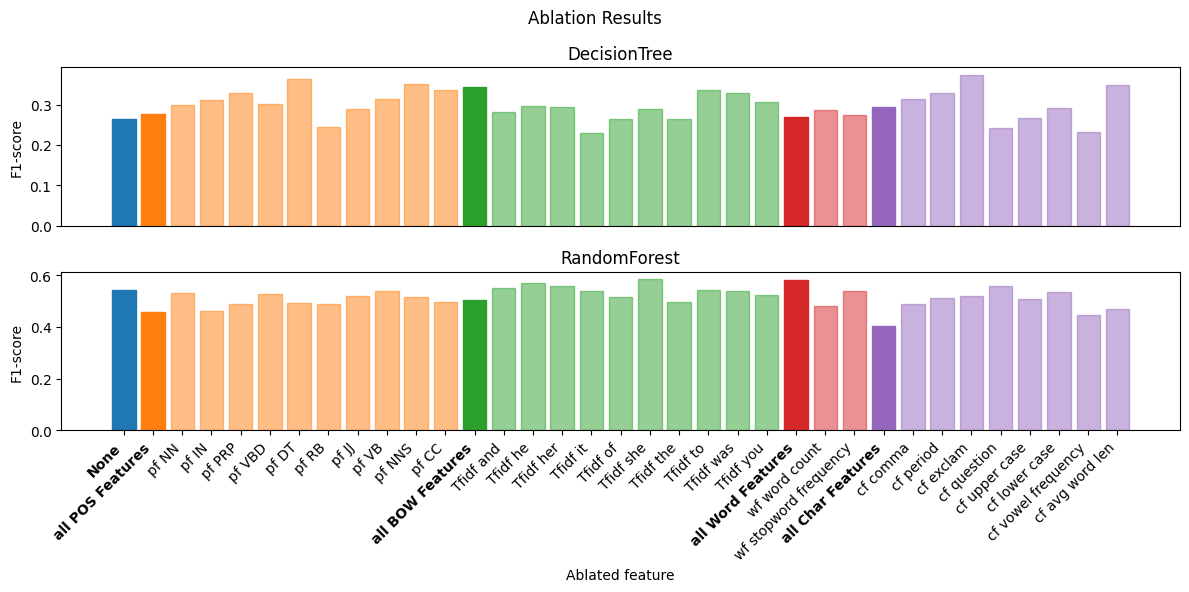

In [6]:
evaluate_on_dev(
    dev_set = DEV_SET.copy(deep=True),
    feature_dict = deepcopy(feature_dict),
    model_dict = deepcopy(model_dict)
)

Extracting features for X_train: ...
Extracting features for X_test: ...
Training and testing 2 models


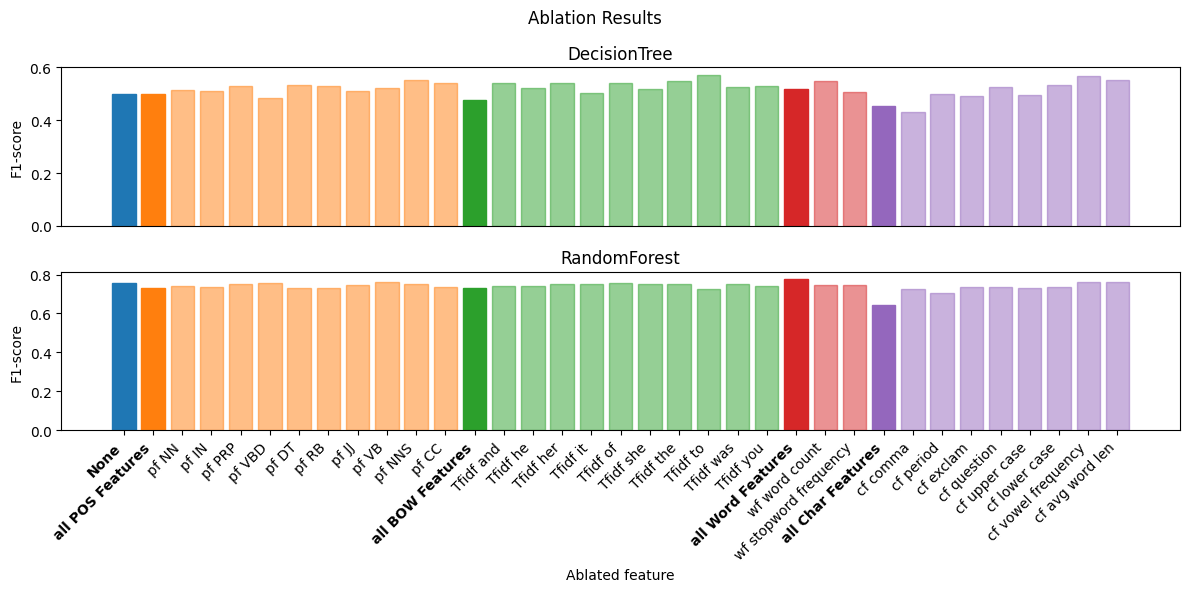

In [7]:
evaluate_on_train_test(
    train_set=TRAIN_SET.copy(deep=True),
    test_set=TEST_SET.copy(deep=True),
    feature_dict=deepcopy(feature_dict),
    model_dict=deepcopy(model_dict)
)